In [8]:
import ast
import pandas as pd
import matplotlib.pyplot as plt
from datasets import load_dataset
import seaborn as sns

dataset= load_dataset('lukebarousse/data_jobs')
df=dataset['train'].to_pandas()

df['job_posted_date']=pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [9]:
df_US = df[df['job_country']=='United States'].copy()
df_explode = df_US.explode('job_skills')
df_skills_count = df_explode.groupby(['job_title_short', 'job_skills']).size().sort_values(ascending=False).reset_index(name='skill_count')

# This is one way to get the top 3 most popular roles (which is the three we used before)
job_titles = df_skills_count['job_title_short'].unique().tolist()

# This is to organize alphabetically
job_title = sorted(job_titles[:3])

In [10]:
# This is how we include percentages! By adding a new column that displays the percent

df_job_title_count = df_US['job_title_short'].value_counts().reset_index(name='jobs_total')
df_skills_perc= pd.merge(df_skills_count, df_job_title_count, how='left', on='job_title_short')

df_skills_perc['percent'] = (df_skills_perc['skill_count']/df_skills_perc['jobs_total'])*100

df_skills_perc

,job_title_short,job_skills,skill_count,jobs_total,percent
0,Data Scientist,python,42379,58830,72.036376
1,Data Analyst,sql,34452,67816,50.802171
2,Data Scientist,sql,30034,58830,51.052184
3,Data Analyst,excel,27519,67816,40.578919
4,Data Scientist,r,26022,58830,44.232534
...,...,...,...,...,...
1865,Senior Data Engineer,asp.net core,1,9289,0.010765
1866,Cloud Engineer,ms access,1,423,0.236407
1867,Machine Learning Engineer,graphql,1,921,0.108578
1868,Senior Data Scientist,mariadb,1,12946,0.007724


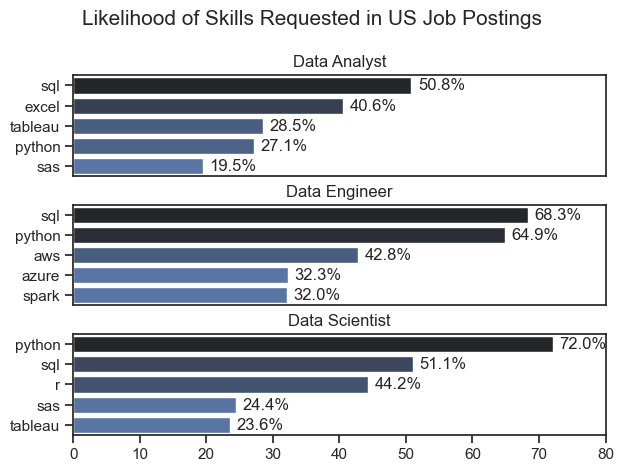

In [11]:
fig, ax = plt.subplots(3,1)
sns.set_theme(style='ticks')
for i, job in enumerate(job_title):
    df_plot = df_skills_perc[df_skills_perc['job_title_short']==job].head(5)
    # df_plot.plot(kind='barh', x = 'job_skills', y='percent', ax=ax[i], title=job, legend=False)
    sns.barplot(data=df_plot, x='percent', y='job_skills', hue='percent', palette = 'dark:b_r', ax=ax[i], legend=False)
    ax[i].set_title(f'{job}')
    ax[i].set_ylabel('')
    ax[i].set_xlabel('')
    ax[i].set_xlim(0,80)
    for n, perc in enumerate(df_plot['percent']):
        ax[i].text(perc + 1, n, f'{perc:.1f}%', va='center')
    if i != len(job_title) - 1:
        ax[i].set_xticks([])
fig.suptitle('Likelihood of Skills Requested in US Job Postings', fontsize=15)
fig.tight_layout(h_pad=0.5)




# THIS IS THE SAME SHIT WE DID BUT WE WANT PERCENTAGE NOW INSTEAD OF COUNTS
# Lets try use seaborn though